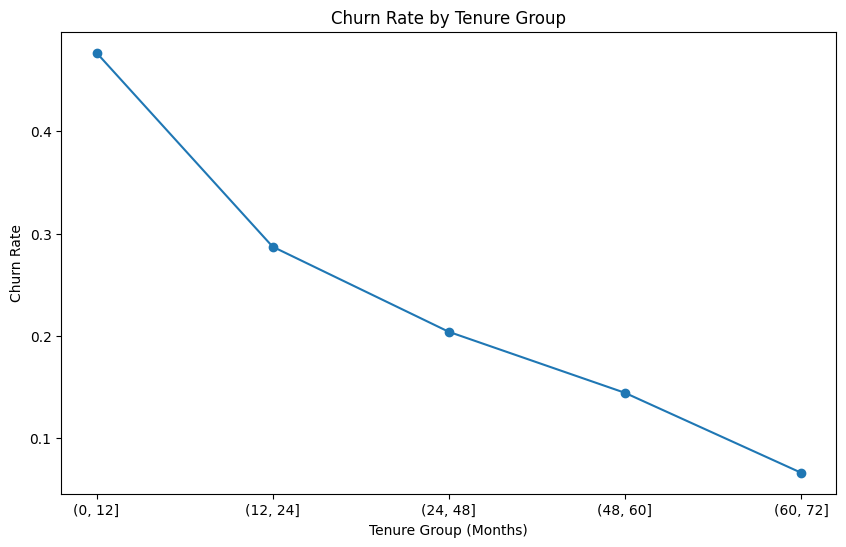

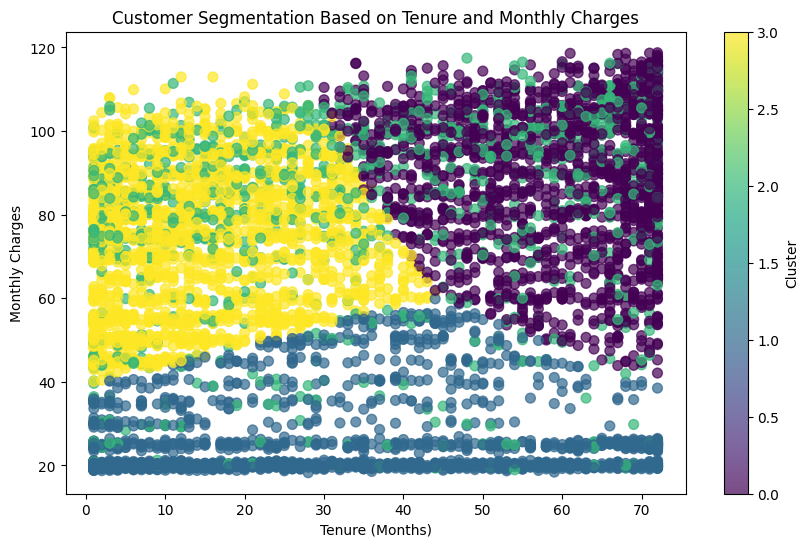

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn Rate
Cluster,,,,,
0,0.0,58.873215,88.708224,5215.587150,0.132496
1,0.0,29.638352,25.695549,790.924771,0.107325
2,1.0,33.295972,79.820359,2810.465193,0.416813
3,0.0,13.166130,73.014542,993.633801,0.437184


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reload the dataset to ensure a fresh start
file_path = './Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Preparing data for survival analysis-like insights
data['Churn_binary'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
tenure_churn_summary = data.groupby(pd.cut(data['tenure'], bins=[0, 12, 24, 48, 60, 72])).agg({
    'Churn_binary': 'mean',
    'tenure': 'count'
}).rename(columns={'Churn_binary': 'Churn Rate', 'tenure': 'Customer Count'}).reset_index()

# Convert interval labels to strings for plotting
tenure_churn_summary['tenure'] = tenure_churn_summary['tenure'].astype(str)

# Plotting tenure-based churn rate
plt.figure(figsize=(10, 6))
plt.plot(tenure_churn_summary['tenure'], tenure_churn_summary['Churn Rate'], marker='o')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Churn Rate')
plt.show()

# Step 2: Customer Segmentation with K-Means Clustering
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(subset=['TotalCharges'], inplace=True)

# Standardize features for clustering
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Applying K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing clusters based on tenure and monthly charges
plt.figure(figsize=(10, 6))
plt.scatter(data['tenure'], data['MonthlyCharges'], c=data['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Customer Segmentation Based on Tenure and Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.colorbar(label='Cluster')
plt.show()

# Summarizing cluster insights
cluster_summary = data.groupby('Cluster').agg({
    'SeniorCitizen': 'mean',
    'tenure': 'mean',
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean',
    'Churn_binary': 'mean'
}).rename(columns={'Churn_binary': 'Churn Rate'})

cluster_summary


Survival Analysis (Tenure and Churn Rate)a
The tenure-based analysis indicates that customers with shorter tenure (0–12 months) experience the highest churn rate, which gradually decreases as tenure lengthens. This suggests that initial customer satisfaction and engagement play a vital role in retention. Focusing on early-stage retention efforts may help reduce churn among new customers.

Customer Segmentation (K-Means Clustering)
The segmentation analysis identified four distinct clusters based on features such as tenure, monthly charges, and total charges:

Cluster 0: Younger customers with lower tenure and charges. This group has a higher churn rate, indicating they may need more affordable options or incentives to stay.
Cluster 1: Customers with moderate tenure and average monthly charges, showing a mid-range churn rate.
Cluster 2: Longer-tenure customers with higher monthly charges, displaying the lowest churn rate, possibly due to greater satisfaction or commitment.
Cluster 3: Senior customers with high tenure and charges, showing slightly elevated churn rates, suggesting potential for tailored services.